In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import tensorflow as tf

In [3]:
import glob

In [4]:
all_files = glob.glob('./ipl_csv2/*.csv')
df_from_each_file = (pd.read_csv(f) for f in all_files)
df = pd.concat(df_from_each_file, ignore_index=True)

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  This is separate from the ipykernel package so we can avoid doing imports until


In [74]:
df.head(2)

,match_id,season,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,wicket_type
0,1082591,2017,"Rajiv Gandhi International Stadium, Uppal",1,0.1,Sunrisers Hyderabad,Royal Challengers Bangalore,DA Warner,S Dhawan,TS Mills,0,0,NaN,NaN,NaN,NaN,NaN
1,1082591,2017,"Rajiv Gandhi International Stadium, Uppal",1,0.2,Sunrisers Hyderabad,Royal Challengers Bangalore,DA Warner,S Dhawan,TS Mills,0,0,NaN,NaN,NaN,NaN,NaN


In [6]:
len(df)

388708

In [7]:
data = pd.DataFrame(data=df)

In [8]:
data.columns

Index(['match_id', 'season', 'start_date', 'venue', 'innings', 'ball',
       'batting_team', 'bowling_team', 'striker', 'non_striker', 'bowler',
       'runs_off_bat', 'extras', 'wides', 'noballs', 'byes', 'legbyes',
       'penalty', 'wicket_type', 'player_dismissed', 'other_wicket_type',
       'other_player_dismissed'],
      dtype='object')

In [9]:
data.isnull().sum()

match_id                       0
season                         0
start_date                     0
venue                          0
innings                        0
ball                           0
batting_team                   0
bowling_team                   0
striker                        0
non_striker                    0
bowler                         0
runs_off_bat                   0
extras                         0
wides                     376940
noballs                   387160
byes                      387686
legbyes                   382472
penalty                   388704
wicket_type               369588
player_dismissed          369588
other_wicket_type         388708
other_player_dismissed    388708
dtype: int64

In [10]:
data.dtypes

match_id                    int64
season                     object
start_date                 object
venue                      object
innings                     int64
ball                      float64
batting_team               object
bowling_team               object
striker                    object
non_striker                object
bowler                     object
runs_off_bat                int64
extras                      int64
wides                     float64
noballs                   float64
byes                      float64
legbyes                   float64
penalty                   float64
wicket_type                object
player_dismissed           object
other_wicket_type         float64
other_player_dismissed    float64
dtype: object

In [11]:
df.drop(['other_player_dismissed','other_wicket_type'], axis=1, inplace=True)

In [12]:
df.columns

Index(['match_id', 'season', 'start_date', 'venue', 'innings', 'ball',
       'batting_team', 'bowling_team', 'striker', 'non_striker', 'bowler',
       'runs_off_bat', 'extras', 'wides', 'noballs', 'byes', 'legbyes',
       'penalty', 'wicket_type', 'player_dismissed'],
      dtype='object')

In [13]:
df.isnull().sum()

match_id                 0
season                   0
start_date               0
venue                    0
innings                  0
ball                     0
batting_team             0
bowling_team             0
striker                  0
non_striker              0
bowler                   0
runs_off_bat             0
extras                   0
wides               376940
noballs             387160
byes                387686
legbyes             382472
penalty             388704
wicket_type         369588
player_dismissed    369588
dtype: int64

In [14]:
data = df

In [15]:
data.isnull().sum()

match_id                 0
season                   0
start_date               0
venue                    0
innings                  0
ball                     0
batting_team             0
bowling_team             0
striker                  0
non_striker              0
bowler                   0
runs_off_bat             0
extras                   0
wides               376940
noballs             387160
byes                387686
legbyes             382472
penalty             388704
wicket_type         369588
player_dismissed    369588
dtype: int64

In [16]:
data['player_dismissed'].unique()

array([nan, 'DA Warner', 'S Dhawan', 'MC Henriques', 'Yuvraj Singh',
       'Mandeep Singh', 'CH Gayle', 'KM Jadhav', 'TM Head', 'Sachin Baby',
       'STR Binny', 'SR Watson', 'S Aravind', 'TS Mills', 'YS Chahal',
       'PA Patel', 'RG Sharma', 'JC Buttler', 'AT Rayudu', 'KH Pandya',
       'N Rana', 'KA Pollard', 'TG Southee', 'MA Agarwal', 'AM Rahane',
       'BA Stokes', 'JJ Roy', 'BB McCullum', 'AJ Finch', 'KD Karthik',
       'SPD Smith', 'MS Dhoni', 'DT Christian', 'M Vohra', 'WP Saha',
       'HM Amla', 'AR Patel', 'Vishnu Vinod', 'P Negi', 'AP Tare',
       'KK Nair', 'SW Billings', 'SV Samson', 'CH Morris',
       'CR Brathwaite', 'PJ Cummins', 'RR Pant', 'S Nadeem', 'SK Raina',
       'DR Smith', 'DS Kulkarni', 'G Gambhir', 'RV Uthappa', 'CA Lynn',
       'YK Pathan', 'SA Yadav', 'CR Woakes', 'SP Narine', 'RA Tripathi',
       'F du Plessis', 'R Bhatia', 'DL Chahar', 'A Zampa', 'AB Dinda',
       'DJ Hooda', 'BCJ Cutting', 'V Shankar', 'NV Ojha', 'Rashid Khan',
       'MP S

In [17]:
data.drop(['penalty','player_dismissed'], inplace=True, axis=1)

In [18]:
data.columns

Index(['match_id', 'season', 'start_date', 'venue', 'innings', 'ball',
       'batting_team', 'bowling_team', 'striker', 'non_striker', 'bowler',
       'runs_off_bat', 'extras', 'wides', 'noballs', 'byes', 'legbyes',
       'wicket_type'],
      dtype='object')

In [19]:
data.isnull().sum()

match_id             0
season               0
start_date           0
venue                0
innings              0
ball                 0
batting_team         0
bowling_team         0
striker              0
non_striker          0
bowler               0
runs_off_bat         0
extras               0
wides           376940
noballs         387160
byes            387686
legbyes         382472
wicket_type     369588
dtype: int64

In [20]:
data.dtypes

match_id          int64
season           object
start_date       object
venue            object
innings           int64
ball            float64
batting_team     object
bowling_team     object
striker          object
non_striker      object
bowler           object
runs_off_bat      int64
extras            int64
wides           float64
noballs         float64
byes            float64
legbyes         float64
wicket_type      object
dtype: object

In [21]:
data['season'].unique()

array([2017, 2018, 2019, '2020/21', 2021, '2007/08', 2009, '2009/10',
       2011, 2012, 2013, 2014, 2015, 2016, '2009', '2011', '2012', '2018',
       '2019', '2021'], dtype=object)

In [22]:
data['year'] = data['season'].astype(str).str.slice(0,4)

In [23]:
data['year'].unique()

array(['2017', '2018', '2019', '2020', '2021', '2007', '2009', '2011',
       '2012', '2013', '2014', '2015', '2016'], dtype=object)

In [24]:
data.isnull().sum()

match_id             0
season               0
start_date           0
venue                0
innings              0
ball                 0
batting_team         0
bowling_team         0
striker              0
non_striker          0
bowler               0
runs_off_bat         0
extras               0
wides           376940
noballs         387160
byes            387686
legbyes         382472
wicket_type     369588
year                 0
dtype: int64

In [25]:
data['season']=data['year']
data.drop('year',inplace=True,axis=1)

In [26]:
data['season'] = data['season'].astype(int)

In [27]:
data['start_date'].head()

0    2017-04-05
1    2017-04-05
2    2017-04-05
3    2017-04-05
4    2017-04-05
Name: start_date, dtype: object

In [28]:
data['date'] = pd.to_datetime(data['start_date'])

In [29]:
data.drop(['date','start_date'], inplace=True, axis=1)

In [30]:
data.dtypes

match_id          int64
season            int32
venue            object
innings           int64
ball            float64
batting_team     object
bowling_team     object
striker          object
non_striker      object
bowler           object
runs_off_bat      int64
extras            int64
wides           float64
noballs         float64
byes            float64
legbyes         float64
wicket_type      object
dtype: object

In [31]:
data['bowling_team'].unique()

array(['Royal Challengers Bangalore', 'Sunrisers Hyderabad',
       'Rising Pune Supergiant', 'Mumbai Indians',
       'Kolkata Knight Riders', 'Gujarat Lions', 'Kings XI Punjab',
       'Delhi Daredevils', 'Chennai Super Kings', 'Rajasthan Royals',
       'Delhi Capitals', 'Deccan Chargers', 'Kochi Tuskers Kerala',
       'Pune Warriors', 'Rising Pune Supergiants'], dtype=object)

In [32]:
from sklearn.preprocessing import LabelEncoder

In [33]:
data['bowling_team'].unique()

array(['Royal Challengers Bangalore', 'Sunrisers Hyderabad',
       'Rising Pune Supergiant', 'Mumbai Indians',
       'Kolkata Knight Riders', 'Gujarat Lions', 'Kings XI Punjab',
       'Delhi Daredevils', 'Chennai Super Kings', 'Rajasthan Royals',
       'Delhi Capitals', 'Deccan Chargers', 'Kochi Tuskers Kerala',
       'Pune Warriors', 'Rising Pune Supergiants'], dtype=object)

In [34]:
data.dtypes

match_id          int64
season            int32
venue            object
innings           int64
ball            float64
batting_team     object
bowling_team     object
striker          object
non_striker      object
bowler           object
runs_off_bat      int64
extras            int64
wides           float64
noballs         float64
byes            float64
legbyes         float64
wicket_type      object
dtype: object

In [35]:
data = data.replace(to_replace =["Rising Pune Supergiant","Rising Pune Supergiants"], value ="Pune Warriors")

In [36]:
len(data['venue'].unique())

42

In [37]:
encoder = LabelEncoder()

In [38]:
for i in ['bowling_team', 'batting_team', 'venue', 'striker', 'non_striker', 'bowler']:
    data[i] = encoder.fit_transform(data[i])

In [39]:
data.head()

,match_id,season,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,wicket_type
0,1082591,2017,29,1,0.1,12,11,116,407,395,0,0,NaN,NaN,NaN,NaN,NaN
1,1082591,2017,29,1,0.2,12,11,116,407,395,0,0,NaN,NaN,NaN,NaN,NaN
2,1082591,2017,29,1,0.3,12,11,116,407,395,4,0,NaN,NaN,NaN,NaN,NaN
3,1082591,2017,29,1,0.4,12,11,116,407,395,0,0,NaN,NaN,NaN,NaN,NaN
4,1082591,2017,29,1,0.5,12,11,116,407,395,0,2,2.0,NaN,NaN,NaN,NaN


In [40]:
data.dtypes

match_id          int64
season            int64
venue             int32
innings           int64
ball            float64
batting_team      int32
bowling_team      int32
striker           int32
non_striker       int32
bowler            int32
runs_off_bat      int64
extras            int64
wides           float64
noballs         float64
byes            float64
legbyes         float64
wicket_type      object
dtype: object

In [41]:
data['wicket_type'].unique()

array([nan, 'caught', 'bowled', 'run out', 'lbw', 'caught and bowled',
       'stumped', 'retired hurt', 'hit wicket', 'obstructing the field'],
      dtype=object)

In [42]:
wicket = pd.get_dummies(data['wicket_type'], drop_first=True)

In [43]:
data = pd.concat([data,wicket], axis=1)

In [44]:
data.head()

,match_id,season,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,...,legbyes,wicket_type,caught,caught and bowled,hit wicket,lbw,obstructing the field,retired hurt,run out,stumped
0,1082591,2017,29,1,0.1,12,11,116,407,395,...,NaN,NaN,0,0,0,0,0,0,0,0
1,1082591,2017,29,1,0.2,12,11,116,407,395,...,NaN,NaN,0,0,0,0,0,0,0,0
2,1082591,2017,29,1,0.3,12,11,116,407,395,...,NaN,NaN,0,0,0,0,0,0,0,0
3,1082591,2017,29,1,0.4,12,11,116,407,395,...,NaN,NaN,0,0,0,0,0,0,0,0
4,1082591,2017,29,1,0.5,12,11,116,407,395,...,NaN,NaN,0,0,0,0,0,0,0,0


In [45]:
data['wicket_type'].unique()

array([nan, 'caught', 'bowled', 'run out', 'lbw', 'caught and bowled',
       'stumped', 'retired hurt', 'hit wicket', 'obstructing the field'],
      dtype=object)

In [46]:
data['wicket_type'] = encoder.fit_transform(data['wicket_type'].astype(str))

In [47]:
data.dtypes

match_id                   int64
season                     int64
venue                      int32
innings                    int64
ball                     float64
batting_team               int32
bowling_team               int32
striker                    int32
non_striker                int32
bowler                     int32
runs_off_bat               int64
extras                     int64
wides                    float64
noballs                  float64
byes                     float64
legbyes                  float64
wicket_type                int32
caught                     uint8
caught and bowled          uint8
hit wicket                 uint8
lbw                        uint8
obstructing the field      uint8
retired hurt               uint8
run out                    uint8
stumped                    uint8
dtype: object

In [48]:
data.head()

,match_id,season,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,...,legbyes,wicket_type,caught,caught and bowled,hit wicket,lbw,obstructing the field,retired hurt,run out,stumped
0,1082591,2017,29,1,0.1,12,11,116,407,395,...,NaN,5,0,0,0,0,0,0,0,0
1,1082591,2017,29,1,0.2,12,11,116,407,395,...,NaN,5,0,0,0,0,0,0,0,0
2,1082591,2017,29,1,0.3,12,11,116,407,395,...,NaN,5,0,0,0,0,0,0,0,0
3,1082591,2017,29,1,0.4,12,11,116,407,395,...,NaN,5,0,0,0,0,0,0,0,0
4,1082591,2017,29,1,0.5,12,11,116,407,395,...,NaN,5,0,0,0,0,0,0,0,0


In [49]:
data.corr()

,match_id,season,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,...,legbyes,wicket_type,caught,caught and bowled,hit wicket,lbw,obstructing the field,retired hurt,run out,stumped
match_id,1.000000,0.981881,0.016353,0.002468,0.007424,0.134676,0.134785,-0.010374,-0.003248,-0.003722,...,-0.006377,-0.004591,0.005805,-0.000205,0.001477,-0.000074,0.001370,-0.000290,-0.010918,-0.004783
season,0.981881,1.000000,0.031351,0.003754,0.008867,0.138467,0.139418,-0.022540,-0.016533,-0.008643,...,-0.002819,-0.004779,0.005478,-0.000212,0.000869,-0.000136,0.001798,-0.000706,-0.011945,-0.005139
venue,0.016353,0.031351,1.000000,0.001883,0.003272,0.097981,0.097861,-0.014825,-0.019115,-0.016207,...,-0.031402,0.002056,-0.000270,0.003310,-0.001029,0.000564,-0.003056,0.002062,-0.002085,0.000610
innings,0.002468,0.003754,0.001883,1.000000,-0.051404,0.007644,-0.009275,-0.003468,-0.006782,-0.011186,...,0.024509,-0.002854,-0.001073,0.001619,-0.001049,0.002411,0.003289,0.000921,-0.006737,0.003354
ball,0.007424,0.008867,0.003272,-0.051404,1.000000,-0.003443,0.000929,-0.025616,-0.033516,-0.008674,...,-0.077499,-0.047739,0.055117,0.012976,0.005118,-0.002533,0.005062,-0.000501,0.044141,0.010624
batting_team,0.134676,0.138467,0.097981,0.007644,-0.003443,1.000000,-0.114021,-0.007908,-0.013974,-0.014282,...,-0.001865,-0.002844,0.000304,0.002094,0.005955,-0.002662,-0.001697,0.002375,0.000206,-0.001463
bowling_team,0.134785,0.139418,0.097861,-0.009275,0.000929,-0.114021,1.000000,-0.025980,-0.026895,0.054971,...,-0.026630,0.000752,-0.001338,-0.000830,-0.003511,0.000843,0.003330,0.003060,-0.001457,-0.001505
striker,-0.010374,-0.022540,-0.014825,-0.003468,-0.025616,-0.007908,-0.025980,1.000000,-0.136056,0.006784,...,-0.013165,-0.000905,0.004284,-0.001046,0.002885,-0.004196,-0.000177,0.000319,-0.000527,-0.001693
non_striker,-0.003248,-0.016533,-0.019115,-0.006782,-0.033516,-0.013974,-0.026895,-0.136056,1.000000,0.004494,...,-0.002718,-0.003295,0.000796,-0.000911,0.000244,0.002563,-0.002162,-0.000865,-0.000007,-0.005016
bowler,-0.003722,-0.008643,-0.016207,-0.011186,-0.008674,-0.014282,0.054971,0.006784,0.004494,1.000000,...,0.018825,0.002754,-0.004304,-0.002207,-0.001022,0.004648,0.002136,0.001829,-0.000079,0.002568


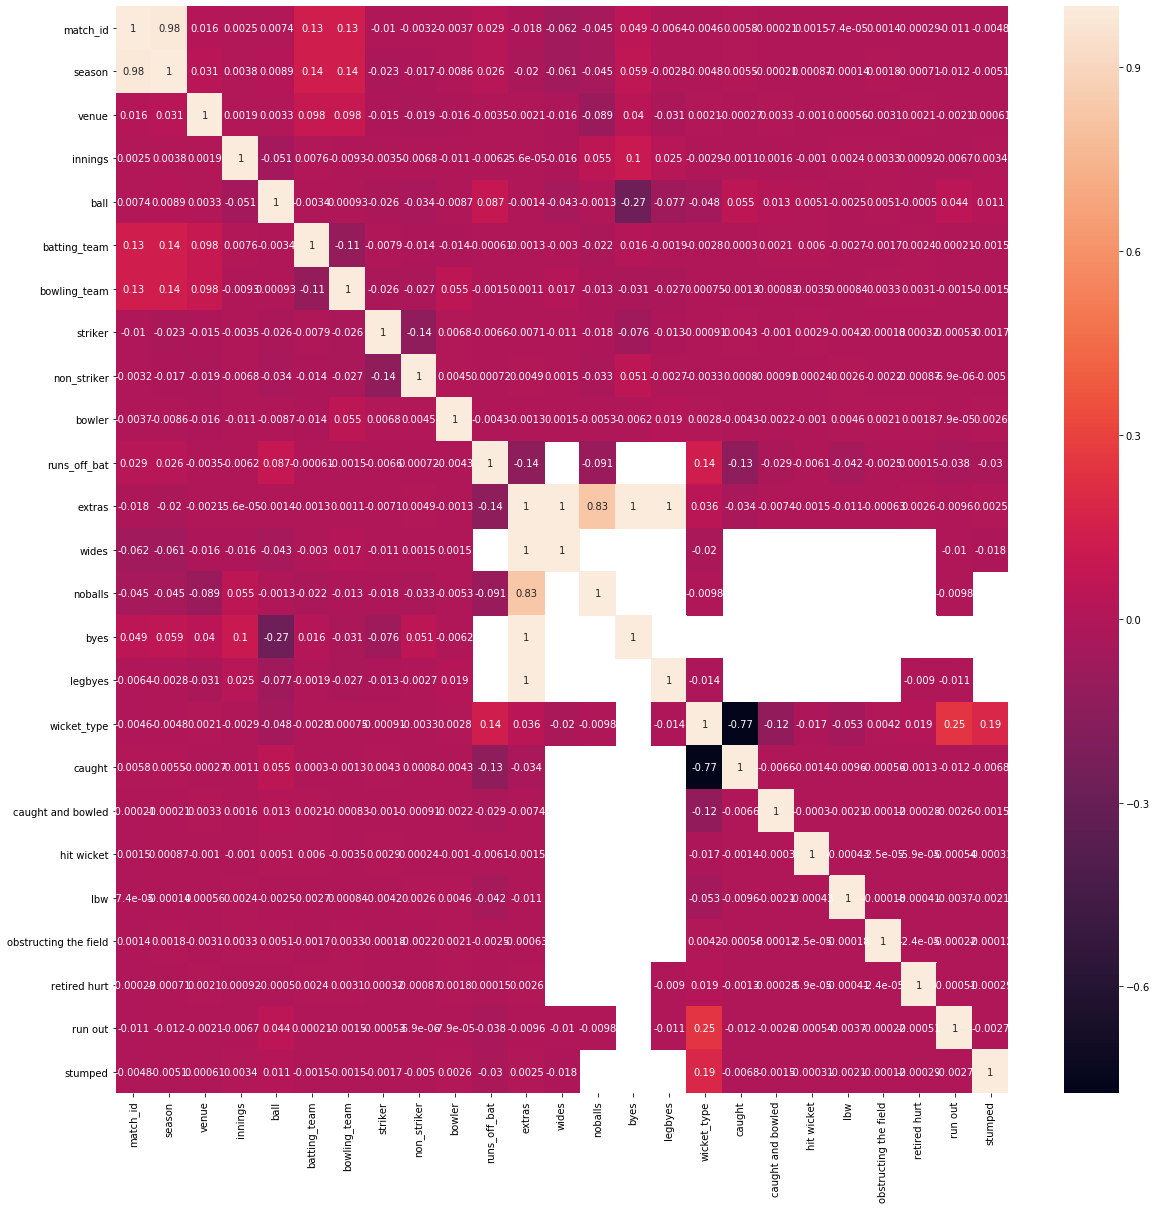

In [50]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(), annot=True)

In [51]:
data.drop('wicket_type',axis=1,inplace=True)

In [52]:
data.head(10)

,match_id,season,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,...,byes,legbyes,caught,caught and bowled,hit wicket,lbw,obstructing the field,retired hurt,run out,stumped
0,1082591,2017,29,1,0.1,12,11,116,407,395,...,NaN,NaN,0,0,0,0,0,0,0,0
1,1082591,2017,29,1,0.2,12,11,116,407,395,...,NaN,NaN,0,0,0,0,0,0,0,0
2,1082591,2017,29,1,0.3,12,11,116,407,395,...,NaN,NaN,0,0,0,0,0,0,0,0
3,1082591,2017,29,1,0.4,12,11,116,407,395,...,NaN,NaN,0,0,0,0,0,0,0,0
4,1082591,2017,29,1,0.5,12,11,116,407,395,...,NaN,NaN,0,0,0,0,0,0,0,0
5,1082591,2017,29,1,0.6,12,11,410,117,395,...,NaN,NaN,0,0,0,0,0,0,0,0
6,1082591,2017,29,1,0.7,12,11,410,117,395,...,NaN,1.0,0,0,0,0,0,0,0,0
7,1082591,2017,29,1,1.1,12,11,410,117,2,...,NaN,NaN,0,0,0,0,0,0,0,0
8,1082591,2017,29,1,1.2,12,11,116,407,2,...,NaN,NaN,0,0,0,0,0,0,0,0
9,1082591,2017,29,1,1.3,12,11,116,407,2,...,NaN,NaN,0,0,0,0,0,0,0,0


In [53]:
data.dtypes

match_id                   int64
season                     int64
venue                      int32
innings                    int64
ball                     float64
batting_team               int32
bowling_team               int32
striker                    int32
non_striker                int32
bowler                     int32
runs_off_bat               int64
extras                     int64
wides                    float64
noballs                  float64
byes                     float64
legbyes                  float64
caught                     uint8
caught and bowled          uint8
hit wicket                 uint8
lbw                        uint8
obstructing the field      uint8
retired hurt               uint8
run out                    uint8
stumped                    uint8
dtype: object

In [54]:
data.fillna(0)

,match_id,season,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,...,byes,legbyes,caught,caught and bowled,hit wicket,lbw,obstructing the field,retired hurt,run out,stumped
0,1082591,2017,29,1,0.1,12,11,116,407,395,...,0.0,0.0,0,0,0,0,0,0,0,0
1,1082591,2017,29,1,0.2,12,11,116,407,395,...,0.0,0.0,0,0,0,0,0,0,0,0
2,1082591,2017,29,1,0.3,12,11,116,407,395,...,0.0,0.0,0,0,0,0,0,0,0,0
3,1082591,2017,29,1,0.4,12,11,116,407,395,...,0.0,0.0,0,0,0,0,0,0,0,0
4,1082591,2017,29,1,0.5,12,11,116,407,395,...,0.0,0.0,0,0,0,0,0,0,0,0
5,1082591,2017,29,1,0.6,12,11,410,117,395,...,0.0,0.0,0,0,0,0,0,0,0,0
6,1082591,2017,29,1,0.7,12,11,410,117,395,...,0.0,1.0,0,0,0,0,0,0,0,0
7,1082591,2017,29,1,1.1,12,11,410,117,2,...,0.0,0.0,0,0,0,0,0,0,0,0
8,1082591,2017,29,1,1.2,12,11,116,407,2,...,0.0,0.0,0,0,0,0,0,0,0,0
9,1082591,2017,29,1,1.3,12,11,116,407,2,...,0.0,0.0,0,0,0,0,0,0,0,0


In [55]:
data['total_runs'] = data.iloc[:,-14:-9].sum(axis=1)

In [56]:
y=data['total_runs']
X=data.drop(['runs_off_bat','wides','noballs','extras','byes','legbyes','total_runs'],axis=1)

In [57]:
#data = data.groupby('match_id')

In [58]:
from sklearn.model_selection import GroupShuffleSplit
train_inds, test_inds = next(GroupShuffleSplit(test_size=.10, n_splits=2, random_state = 7).split(data, groups=X['match_id']))

X_train = X.iloc[train_inds]
X_test = X.iloc[test_inds]
y_train = y.iloc[train_inds]
y_test = y.iloc[test_inds]

In [59]:
X_test.shape
#len(X_train)

(38834, 18)

In [61]:
len(y_test)

38834

In [62]:
y_test

2116      0.0
2117      0.0
2118      0.0
2119      0.0
2120      1.0
2121      1.0
2122      1.0
2123      0.0
2124      0.0
2125      1.0
2126      0.0
2127      1.0
2128      4.0
2129      4.0
2130      0.0
2131      0.0
2132      0.0
2133      0.0
2134      0.0
2135      3.0
2136      0.0
2137      0.0
2138      1.0
2139      0.0
2140      4.0
2141      0.0
2142      4.0
2143      1.0
2144      0.0
2145      0.0
         ... 
388430    1.0
388431    4.0
388432    1.0
388433    1.0
388434    1.0
388435    0.0
388436    1.0
388437    4.0
388438    0.0
388439    1.0
388440    2.0
388441    0.0
388442    4.0
388443    4.0
388444    2.0
388445    0.0
388446    0.0
388447    4.0
388448    2.0
388449    0.0
388450    1.0
388451    1.0
388452    2.0
388453    1.0
388454    4.0
388455    1.0
388456    4.0
388457    0.0
388458    0.0
388459    4.0
Name: total_runs, Length: 38834, dtype: float64

In [63]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_estimators=50)

In [64]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score

In [65]:
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [66]:
len(y_pred)

38834

In [ ]:
r2 = r2_score(y_test, y_pred)

In [ ]:
print(r2)

In [67]:
y_test.shape

(38834,)

In [ ]:
y_test.iloc[0:36].sum()

In [73]:
X_test.head(250)

,match_id,season,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,caught,caught and bowled,hit wicket,lbw,obstructing the field,retired hurt,run out,stumped
2116,1082600,2017,40,1,0.1,12,8,410,117,133,0,0,0,0,0,0,0,0
2117,1082600,2017,40,1,0.2,12,8,410,117,133,0,0,0,0,0,0,0,0
2118,1082600,2017,40,1,0.3,12,8,410,117,133,0,0,0,0,0,0,0,0
2119,1082600,2017,40,1,0.4,12,8,410,117,133,0,0,0,0,0,0,0,0
2120,1082600,2017,40,1,0.5,12,8,410,117,133,0,0,0,0,0,0,0,0
2121,1082600,2017,40,1,0.6,12,8,116,407,133,0,0,0,0,0,0,0,0
2122,1082600,2017,40,1,1.1,12,8,116,407,352,0,0,0,0,0,0,0,0
2123,1082600,2017,40,1,1.2,12,8,410,117,352,0,0,0,0,0,0,0,0
2124,1082600,2017,40,1,1.3,12,8,410,117,352,0,0,0,0,0,0,0,0
2125,1082600,2017,40,1,1.4,12,8,410,117,352,0,0,0,0,0,0,0,0


In [ ]:
pred = pd.DataFrame(y_pred)


In [ ]:
test = pd.DataFrame(y_test)

In [ ]:
pred.iloc[0:36].sum()

In [ ]:
test.join(pred)